## Drug Dose

In [178]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False )
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False )
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False )
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False )
        
        self.final_bias = nn.Parameter(torch.tensor(-16.0),requires_grad=False)
        
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = self.w01 * top_relu_output

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = self.w11 * bottom_relu_output

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        return output
        

In [180]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses,input_doses.dtype

(tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000]),
 torch.float32)

In [181]:
model = BasicNN()

In [182]:
output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

<Axes: >

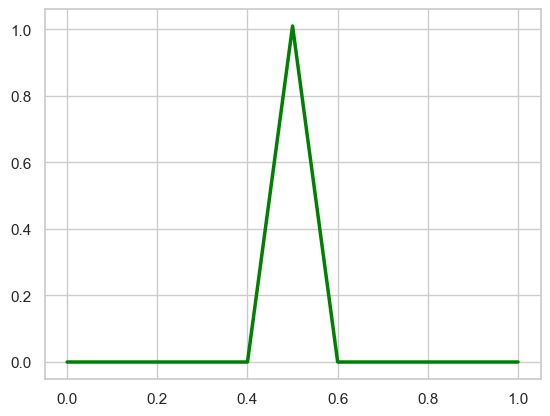

In [183]:
sns.set_theme(style='whitegrid')
sns.lineplot(x=input_doses.numpy(), y=output_values.detach().numpy(), color='green', linewidth=2.5)

In [184]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False )
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False )
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False )
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False )
        
        self.final_bias = nn.Parameter(torch.tensor(0.0),requires_grad=True)
        
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = self.w01 * top_relu_output

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = self.w11 * bottom_relu_output

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        return output
        

In [185]:
model1= BasicNN_train()
output_values= model1(input_doses )

Text(0.5, 0, 'no of doses')

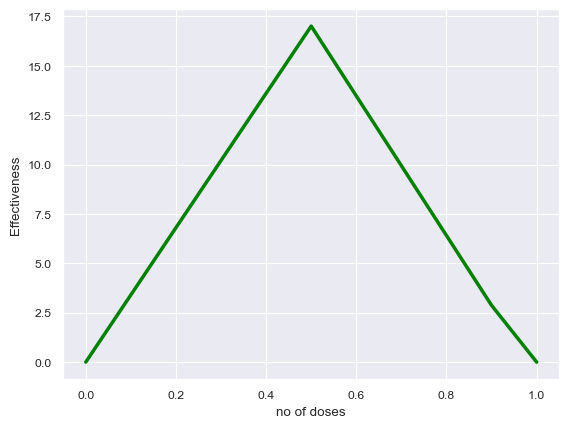

In [186]:
output_values= model1(input_doses)
sns.set_theme('paper')
sns.lineplot(x=input_doses.numpy(),y=output_values.detach().numpy(),color='green',linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel("no of doses")

In [187]:
inputs = torch.Tensor([0.0,0.5,1.0])
labels = torch.Tensor([0.0,1.0,0.0])

In [188]:
# optimizer

optimizer = SGD(model1.parameters(), lr=0.1)
print(f"final bias, before optimization: {str(model1.final_bias.data)}")

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        
        output_i = model1(input_i.unsqueeze(0)).squeeze(0)
        loss = (output_i - label_i) ** 2
        loss.backward()
        total_loss += float(loss)
        
    if (total_loss < 0.0001):
        print(f"Num epochs:{epoch}")
        break
    
    optimizer.step()
    optimizer.zero_grad()
    print(f"final bias, after optimization: {model1.final_bias.data}")
        
    
    
    

final bias, before optimization: tensor(0.)
final bias, after optimization: -3.202000141143799
final bias, after optimization: -5.7636003494262695
final bias, after optimization: -7.812880516052246
final bias, after optimization: -9.45230484008789
final bias, after optimization: -10.763843536376953
final bias, after optimization: -11.813075065612793
final bias, after optimization: -12.652460098266602
final bias, after optimization: -13.323967933654785
final bias, after optimization: -13.861174583435059
final bias, after optimization: -14.290939331054688
final bias, after optimization: -14.634751319885254
final bias, after optimization: -14.909801483154297
final bias, after optimization: -15.129840850830078
final bias, after optimization: -15.305872917175293
final bias, after optimization: -15.446698188781738
final bias, after optimization: -15.559358596801758
final bias, after optimization: -15.649486541748047
final bias, after optimization: -15.721589088439941
final bias, after optimi

Text(0.5, 0, 'no of doses')

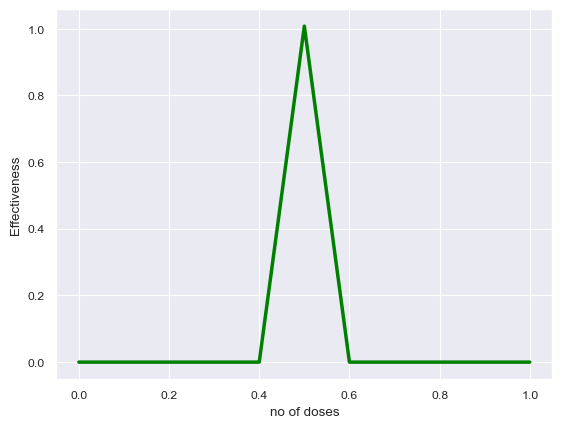

In [189]:
output_values= model1(input_doses)
sns.set_theme('paper')
sns.lineplot(x=input_doses.numpy(),y=output_values.detach().numpy(),color='green',linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel("no of doses")